Josip Koprčina, Data Mining Project 2020/2021 \
A simple project to find out what features of a league of legends game (https://riot.com/3nCKCsN) influence winning the most.

In [ ]:
# Importing needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# Importing data 
data = pd.read_csv("./data/high_diamond_ranked_10min.csv")

y = data[data.columns[1]]
X = pd.DataFrame(data)
del X['gameId']
del X['blueWins']
features = X.columns

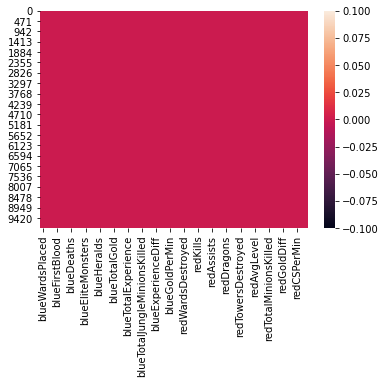

In [ ]:
# Checking are there any null values in my dataset, just in case
sns.heatmap(X.isnull())

In [ ]:
# Normalizing data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(x_scaled, columns=features)

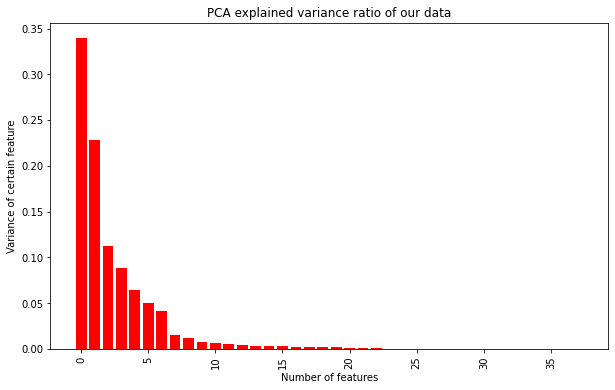

Sum of first 7 components is : 0.9247850303467667
Figure 1: The first 7 components of the data account for around 92% of the variance.


In [ ]:
## PCA 

pca = PCA()
pca.fit(X)

plt.figure(figsize=(10,6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color="red")
plt.xlabel("Number of features")
plt.ylabel("Variance of certain feature")
plt.title("PCA explained variance ratio of our data")
plt.xticks(rotation=90)
plt.show()

print("Sum of first 7 components is : " +str(sum(pca.explained_variance_ratio_[:7])))
print("Figure 1: The first 7 components of the data account for around 92% of the variance.")
component_feature_names = [("principal_component_" + str(i+1)) for i in range(7)]

pca = PCA(n_components=7)
X_PCA = pd.DataFrame(pca.fit_transform(X), columns=component_feature_names)

[Text(0, 0.5, 'f1 score at each depth'),
 Text(0.5, 0, 'max_depth from 1 to 10')]

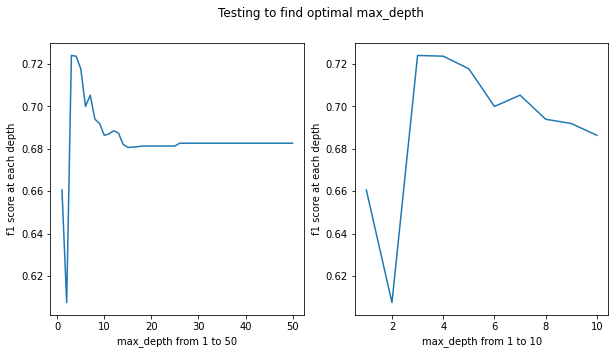

In [ ]:
# Splitting into random folds and using decision trees
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2)

#Looking for optimal tree max_depth
f1_score_list = []
for i in range(50):
  current_f1 = 0
  for j in range(100):
    classifier = DecisionTreeClassifier(min_samples_split=100, max_depth=i+1)
    classifier.fit(X_train, y_train)
    y_pred_dt = classifier.predict(X_test)
    current_f1 += metrics.f1_score(y_test, y_pred_dt)
  f1_score_list.append(current_f1/100)

#Plotting the results
fig, axs = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle("Testing to find optimal max_depth")
axs[0].plot(range(1,51), f1_score_list)
axs[1].plot(range(1,11), f1_score_list[:10])
axs[0].set(xlabel="max_depth from 1 to 50", ylabel="f1 score at each depth")
axs[1].set(xlabel="max_depth from 1 to 10", ylabel="f1 score at each depth")

0.724087591240876
[[665 340]
 [227 744]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1005
           1       0.69      0.77      0.72       971

    accuracy                           0.71      1976
   macro avg       0.72      0.71      0.71      1976
weighted avg       0.72      0.71      0.71      1976



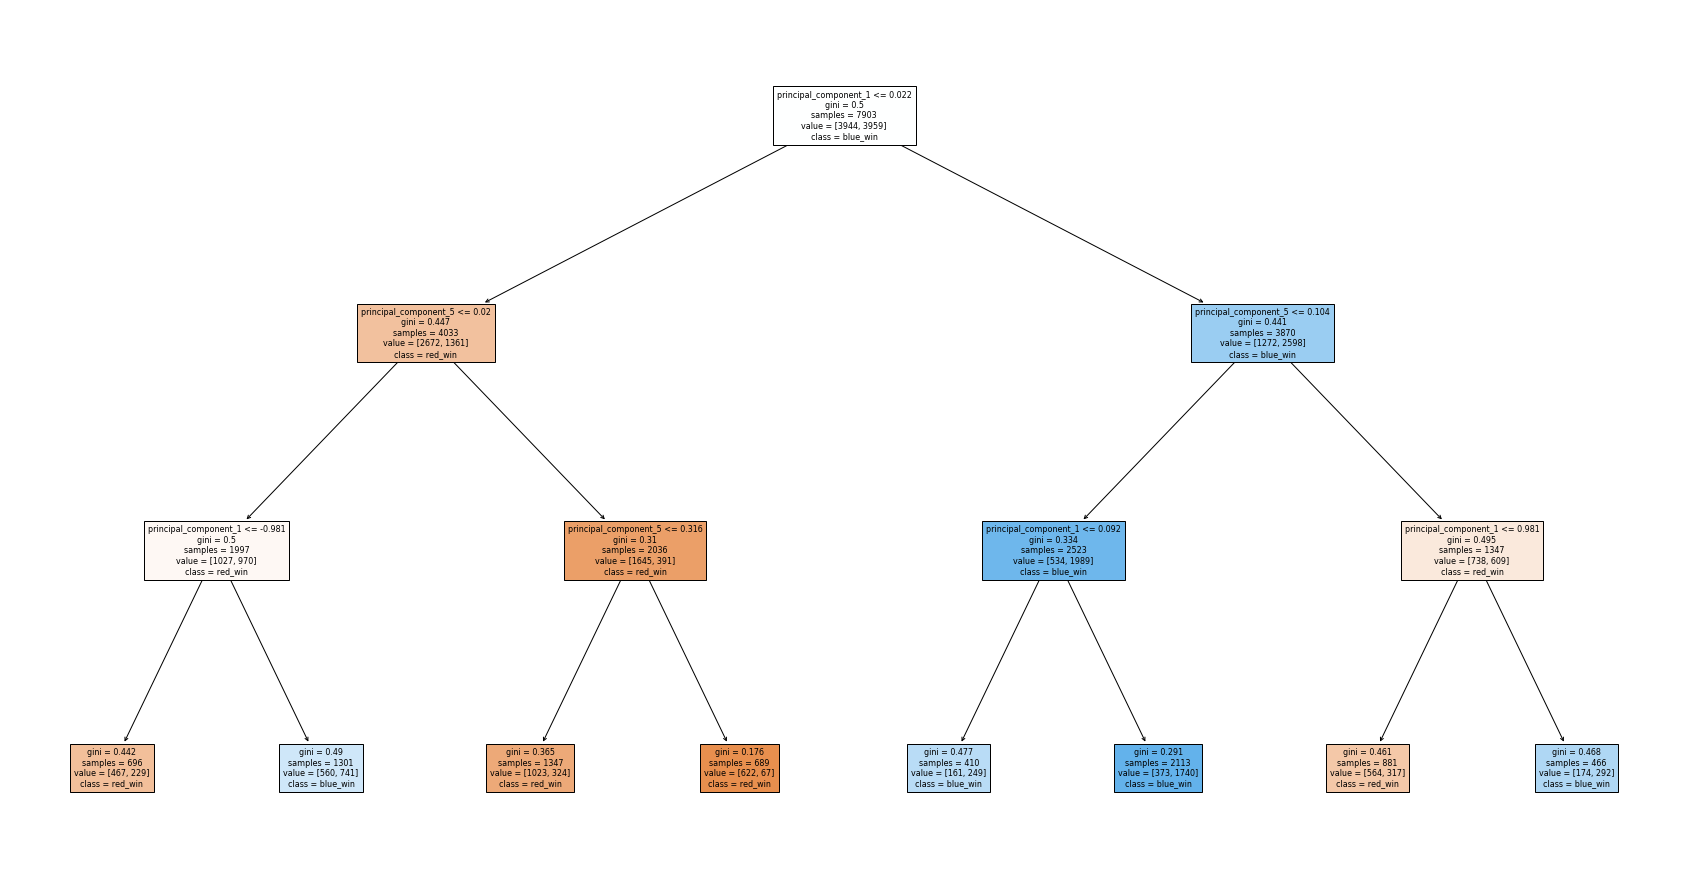

In [ ]:
#Teaching a decision tree classifier
classifier = DecisionTreeClassifier(min_samples_split=100, max_depth=3)
classifier.fit(X_train, y_train)

#Testing the classifier using test data
y_pred_dt = classifier.predict(X_test)

#Printing the quality of our decision tree classifier
print(metrics.f1_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

#Plotting our decision tree for clear visualisation
fig, ax = plt.subplots(figsize=(30, 16))
tree.plot_tree(classifier, feature_names = component_feature_names, class_names=["red_win", "blue_win"], max_depth=5, filled = True, fontsize=8)
plt.show()

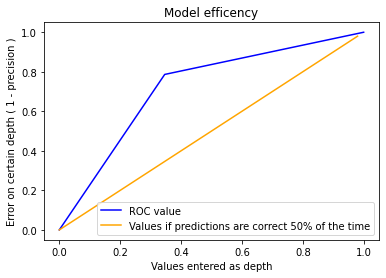

Figure 1:


In [ ]:
# Plotting the quality of our decision tree model
tpr, fpr, thresholds = metrics.roc_curve(y_test, y_pred_dt)
plt.plot(tpr, fpr, color="blue", label = "ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], color="orange", label="Values if predictions are correct 50% of the time")

plt.xlabel('Values entered as depth')
plt.ylabel('Error on certain depth ( 1 - precision )')
plt.title('Model efficency')
plt.legend()
plt.show()
print("Figure 1:")

In [ ]:
# Using logistic regression to classify
f1_scores = []
for i in range(100):
  logmodel = LogisticRegression(max_iter=100)
  logmodel.fit(X_train,y_train)
  y_pred_lr = logmodel.predict(X_test)
  f1_scores.append(metrics.f1_score(y_test, y_pred_lr))
f1_score = sum(f1_scores)/100
print(f1_score)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.7473065621939271
[[697 253]
 [263 763]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       950
           1       0.75      0.74      0.75      1026

    accuracy                           0.74      1976
   macro avg       0.74      0.74      0.74      1976
weighted avg       0.74      0.74      0.74      1976



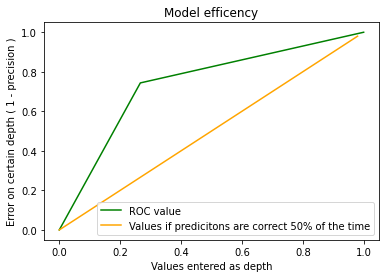

Figure 1:


In [ ]:
# Plotting the quality of our regression model
tpr, fpr, thresholds = metrics.roc_curve(y_test, y_pred_lr)
plt.plot(tpr, fpr, color="green", label = "ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], color="orange", label = "Values if predicitons are correct 50% of the time")

plt.xlabel('Values entered as depth')
plt.ylabel('Error on certain depth ( 1 - precision )')
plt.title('Model efficency')
plt.legend()
plt.show()
print("Figure 1:")

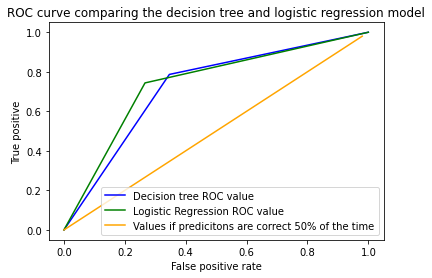

Figure 1:


In [ ]:
# Plotting the comparison of our models
tpr1, fpr1, thresholds = metrics.roc_curve(y_test, y_pred_dt)
tpr2, fpr2, thresholds = metrics.roc_curve(y_test, y_pred_lr)

plt.plot(tpr1, fpr1, color="blue", label = "Decision tree ROC value")
plt.plot(tpr2, fpr2, color="green", label = "Logistic Regression ROC value")

x = [i for i in range(1,100)]
plt.plot([i/100 for i in range(len(x))], [i/100 for i in range(len(x))], color="orange", label = "Values if predicitons are correct 50% of the time")

plt.xlabel('False positive rate')
plt.ylabel('True positive')
plt.title('ROC curve comparing the decision tree and logistic regression model')
plt.legend()
plt.show()
print("Figure 1:")

In [ ]:
## Import data again
data = pd.read_csv("./data/high_diamond_ranked_10min.csv")

y = data[data.columns[1]]
X = pd.DataFrame(data)
del X['gameId']
del X['blueWins']
features = X.columns

# Normalizing data again
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(x_scaled, columns=features)

Feature: blueWardsPlaced, Score: -0.3509130174320868
Feature: blueWardsDestroyed, Score: 0.03394514920067009
Feature: blueFirstBlood, Score: 0.047901587700875714
Feature: blueKills, Score: 0.13869188890165995
Feature: blueDeaths, Score: -0.3119712875945016
Feature: blueAssists, Score: -0.304031421844908
Feature: blueEliteMonsters, Score: 0.1383919314169786
Feature: blueDragons, Score: 0.2758775689923146
Feature: blueHeralds, Score: 0.0009062938416491302
Feature: blueTowersDestroyed, Score: -0.18157500718823363
Feature: blueTotalGold, Score: 1.705166457738492
Feature: blueAvgLevel, Score: 0.26845996788525217
Feature: blueTotalExperience, Score: 0.7185806722201236
Feature: blueTotalMinionsKilled, Score: -0.2363982442361094
Feature: blueTotalJungleMinionsKilled, Score: 0.28919088479080235
Feature: blueGoldDiff, Score: 1.6662712393048944
Feature: blueExperienceDiff, Score: 1.2703895066272064
Feature: blueCSPerMin, Score: -0.23639824423610417
Feature: blueGoldPerMin, Score: 1.70516645773850

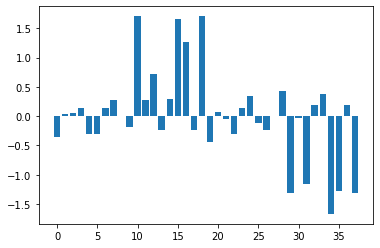

In [ ]:
# Using logistic regression to classify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
importance = logmodel.coef_

for i in range(len(importance[0])):
    print("Feature: " + str(features[i]) + ", Score: "+ str(importance[0][i]))
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

[1.7051664577385042, 1.705166457738492, 1.6662712393048944, 1.2703895066272064, 0.7185806722201236, 0.42596499100383284, 0.3761770521589528, 0.34020032611512835, 0.28919088479080235, 0.2758775689923146, 0.26845996788525217, 0.19669361236557656, 0.1966936123655691, 0.13869188890165995, 0.13869188890165995, 0.1383919314169786, 0.06712794895255073, 0.047901587700875714, 0.03394514920067009, 0.0009062938416491302, 0.0004453837369212954]
['blueGoldPerMin', 'blueTotalGold', 'blueGoldDiff', 'blueExperienceDiff', 'blueTotalExperience', 'redTowersDestroyed', 'redTotalJungleMinionsKilled', 'redAssists', 'blueTotalJungleMinionsKilled', 'blueDragons', 'blueAvgLevel', 'redCSPerMin', 'redTotalMinionsKilled', 'redDeaths', 'blueKills', 'blueEliteMonsters', 'redWardsDestroyed', 'blueFirstBlood', 'blueWardsDestroyed', 'blueHeralds', 'redHeralds']
[1.670023428647725, 1.3085037634352965, 1.3085037634352963, 1.2741416959700278, 1.167560976362446, 0.4445500141948389, 0.3509130174320868, 0.3119712875945016, 

[Text(0, 0.5, 'red team feature importance score')]

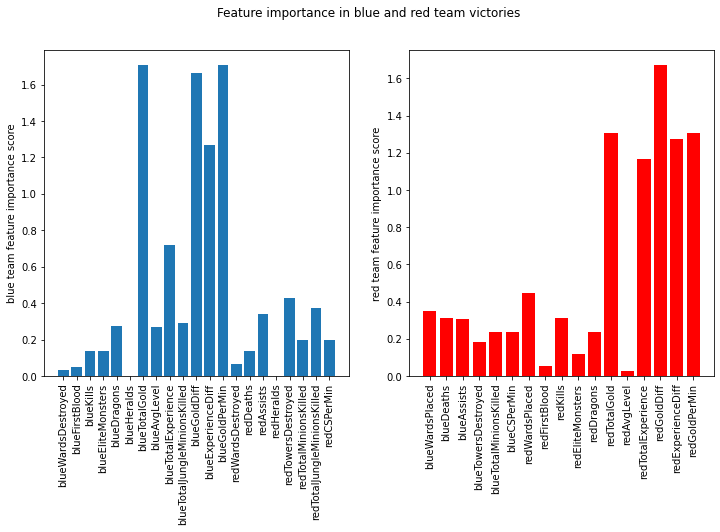

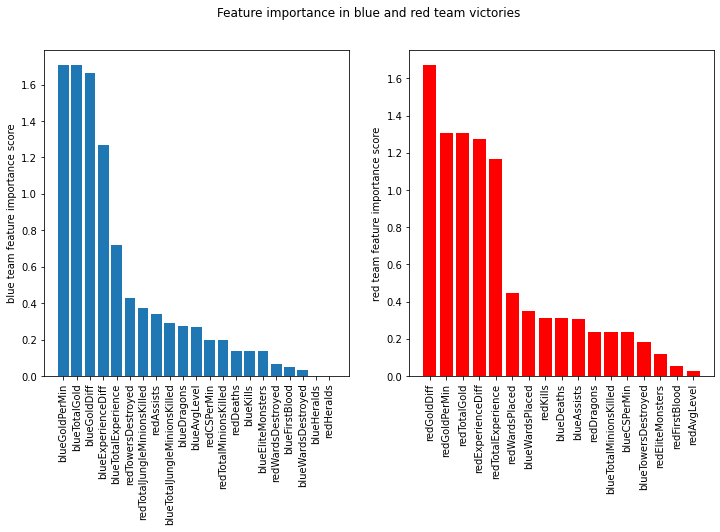

In [ ]:
# We will split them into positive and negative
blue_win_features = []
blue_win_feature_labels = []
red_win_features = []
red_win_feature_labels = []

for i in range(len(importance[0])):
  if importance[0][i] > 0:
    blue_win_features.append(importance[0][i])
    blue_win_feature_labels.append(features[i])
  else:
    red_win_features.append(-1*importance[0][i])
    red_win_feature_labels.append(features[i])

#Plotting the results
fig, axs = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle("Feature importance in blue and red team victories")
axs[0].bar(blue_win_feature_labels, blue_win_features)
axs[1].bar(red_win_feature_labels, red_win_features, color="red")
axs[0].set_xticklabels(blue_win_feature_labels, rotation=90)
axs[1].set_xticklabels(red_win_feature_labels, rotation=90)
axs[0].set(ylabel="blue team feature importance score")
axs[1].set(ylabel="red team feature importance score")

blue_win_feature_labels = [x for _,x in sorted(zip(blue_win_features, blue_win_feature_labels))]
blue_win_feature_labels.reverse()
blue_win_features = sorted(blue_win_features, reverse=True)
red_win_feature_labels = [x for _,x in sorted(zip(red_win_features, red_win_feature_labels))]
red_win_feature_labels.reverse()
red_win_features = sorted(red_win_features, reverse=True)

print(blue_win_features)
print(blue_win_feature_labels)
print(red_win_features)
print(red_win_feature_labels)

#Plotting the results
fig, axs = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle("Feature importance in blue and red team victories")
axs[0].bar(blue_win_feature_labels, blue_win_features)
axs[1].bar(red_win_feature_labels, red_win_features, color="red")
axs[0].set_xticklabels(blue_win_feature_labels, rotation=90)
axs[1].set_xticklabels(red_win_feature_labels, rotation=90)
axs[0].set(ylabel="blue team feature importance score")
axs[1].set(ylabel="red team feature importance score")